In [2]:
using CSV;
using PyCall;
using PyPlot;
using Printf;

np  = pyimport("numpy");
sns = pyimport("seaborn");
ss  = pyimport("scipy.stats");
wrg = pyimport("warnings");
gs  = pyimport("matplotlib.gridspec");

In [3]:
wrg.filterwarnings("ignore")

# 1.0. Capítulo 0

## 1.1. Funções

A e B são dois conjuntos e podemos associar eles a uma reta, e cada elemento $a$ de A pode associar somente com um elemento de $b$ de B, esse é o conceito de função e também o conceito de imágem.
<br>f é aplicação de A em B se e somente se $∀𝑥∈𝐴∃| 𝑦∈𝐵∕(𝑥,𝑦) ∈𝑓$

### <p style="color:#33039c;">1.1.1. Domínio & Imagem</p>

Resumidamente, existe uma função por exemplo uma reta, onde existe o eixo **x** e o eixo **y** em um plano cartesiano, logo cada **x** tem uma relação com a função, logo $f(x)$ é a função avaliada nesse ponto **x** em específico.<br>A função do primeiro grau representada pela reta em **vermelho** esta no eixo X positivo e negativo. Logo o ponto em **vermelho** representado na reta quando o x é igual a 5, na função do primeiro grau $f(5)$ o resultado da função é 0.<br><br>E o ponto em verde é quando o **x** é exatamente 10, colocando na função, logo $f(10)$ é igual a 5.<br>
<p style="color:red;">OBS: Geralmente nas escolas é utilizado $y$ para notação de $f(x)$, nesse notebook vai ser utilizado os dois.</p><br>Pode também ser representada op conceito de domínio e imagem utilizando o Diagrama de Venn, recomendo pesquisar depois.<br> 

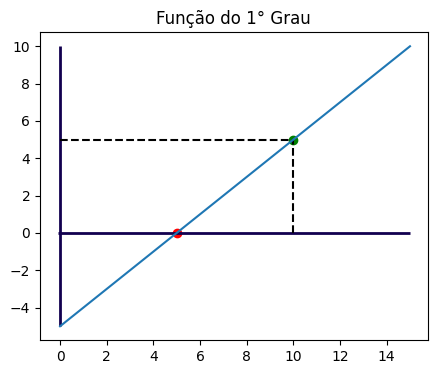

In [156]:
fig, ax = plt.subplots( figsize=(5, 4) )
ax.plot( collect( -5:1:10 ) );
ax.vlines( 0, -5, 10, color="#12004f", linewidth=2, linestyle="-")
ax.hlines( 0, -.1, 15, color="#12004f", linewidth=2, linestyle="-");
ax.vlines( 10, 0, 5, color="k", linestyle="--" )
ax.hlines( 5, 0, 10, color="k", linestyle="--" )
ax.scatter( 5, 0, c="r" )
ax.scatter( 10, 5, c="g" )
ax.set_title("Função do 1° Grau");

### <p style="color:#33039c;">1.1.1. Função Polinomial</p>

As funções polinomias nada mais são que as funções com outros graus.<br>Onde $𝑛~∈~ℕ$, 𝑎 são números reais chamados de $coeficientes$ e o grau de um polinômio é $𝑛$.<br>
Exemplos:

Para as funções polinomias existem algumas fórmulas como:<br>
$f(x) = 2x^{3} + 2x^{2} - 4x$<br>
$g(x) = 3x^{2} - 3x$<br>

Somar os termos semelhantes, caso não tiver nenhum semelhante, então sómente copiar.<br>
$f(x) + g(x) = 2x^{3} + 5x^{2} - 7x$<br>

Subtrair os termos semelhantes, caso não tiver nenhum semelhante, então sómente copiar, porém, precisa multiplicar por -1 para mudar o sinal dos elementos da função.<br>
$((2x^{3} + 2x^{2} - 4x) - (3x^{2} - 3x)) = (2x^{3} + 2x^{2} - 4x -3x^{2} + 3x)~$ Agorá é so aplicar as mesmas regrinhas da soma.<br>
$f(x) - g(x) = 2x^{3} -x^{2} - x$<br>

Para a multiplicação e a divisão vai ser tarefa de casa aprender :)

### <p style="color:#33039c;">1.1.2. Função do 1° Grau</p>

A função polinomial do primeiro grau, tambem conhecida como função afim, é descrita pela seguinte formula:<br>
$f(x) = a \cdot x + b~$ Onde temos os seguintes termos: <p style="color:red;">$a$ Coeficiente Angular (Inclinação da Reta)</p><p style="color:red;">$b$ Coeficiente Linear (Onde a reta corta o eixo Y)</p><br>OBS: $𝑎,𝑏∈ℝ,𝑎≠0$, O coeficiente angular tem que ser diferente de zero, logo ele sendo 0 é uma função **constante**.<br>Pode ser representada também representado a relação de **x** e **y** em um gráfico, conhecido como reta.<br>
Se o coeficiente angular for positivo, logo a retra é crescente, se for negativo, a reta é decrescente.

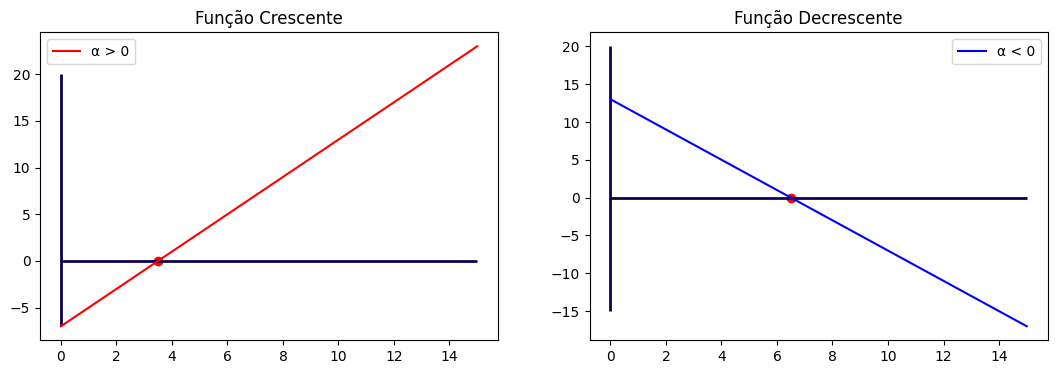

In [119]:
fig, (ax1, ax2) = plt.subplots( 1, 2, figsize=(13, 4) )
for i in zip( [[a * p + b for p in collect( -5:1:10 )], [-a * p + b for p in collect( -5:1:10 )]], 
               [ax1, ax2], ["r", "b"], ["Função Crescente", "Função Decrescente"], [-7, -15], ["α > 0", "α < 0"], [3.5, 6.5] )
    i[2].plot( i[1], c=i[3], label=i[6] );
    i[2].scatter( i[7], 0, c="r" )
    i[2].set_title(i[4])
    i[2].hlines( 0, 0, 15, color="#12004f", linewidth=2, linestyle="-");
    i[2].vlines( 0, i[5], 20, color="#12004f", linewidth=2, linestyle="-");
    i[2].legend();
end

plt.savefig("Linear")

    I) Determine a expressão que define a função Afim que passe pelos pontos (1, 5) e (3, -1).
    
Foi dado um par $(x_0, y_0), (x_1, y_1$), sempre o primeiro número do par é o **x** e o segundo é o **y**.<br>Agora o objetivo é e, um plano cartesiano conseguir desenvolver a fórmula que passe por esses pontos, para isso usa-se a fórmula:<br>
$y - y_0 = m(x - x_0)$ e para descobrir o $m$, utiliza-se a fórmula: $m = \frac{y_1 - y_0}{x_1 - x_0}.$<br>
- Primeiro pásso é desenhar um plano cartesiano com dois eixos e setar os pontos.
- Segundo passo é encontrar o $m$ para aplicar na fórmula.

$m = \frac{-1-5}{3-1} = \frac{-6}{2} = -3$, se for fazer utilizando o inverso dos pontos da o mesmo resultado, logo $m = \frac{5-(-2)}{1-3} = \frac{6}{-2} = -3$

Agora basta utilizar na outra fórmula o resultado de $m=-3$<br>
$y - y_0 = m(x - x_0) = y - 5 = -3(x - 1)$<br>
$y = -3x + 8 ~~ou~~ f(x) = -3x +8$

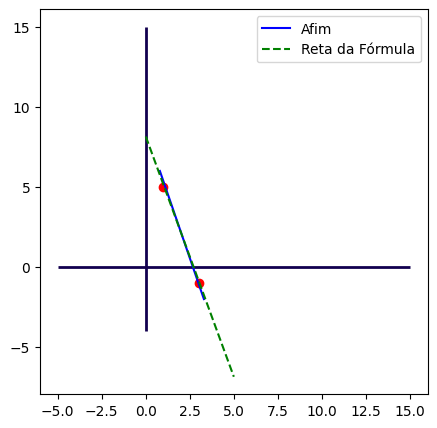

In [208]:
fig, ax = plt.subplots( figsize=(5, 5) );
ax.hlines( 0, -5, 15, color="#12004f", linewidth=2, linestyle="-");
ax.vlines( 0, -4, 15, color="#12004f", linewidth=2, linestyle="-");
ax.scatter( [1, 3], [5, -1], color="r" )
ax.plot( [.8, 3.3], [6, -2], c="b", label="Afim" )
ax.plot( [(-3) * p + 8 for p in collect(-.05:5)], c="g", linestyle="--", label="Reta da Fórmula" ) #-3x + 8
ax.legend();

### <p style="color:#33039c;">1.1.3. Função do 2° Grau</p>

A funçaõ do segundo grau é a clássica função da fórmula de bháskara e é representada quando o maior grau do polinômio é 2, logo a fórmula é: $f(x) = ax^2 + bx + c$, onde possui três parâmetros, $𝑎,𝑏,𝑐∈ℝ, 𝑎 ≠0$ e o $a$ tem que ser diferente de zero, se for zero, logo a função vai ser uma função do primeiro grau.

<p style="color:red;">Coeficiente $a$: Como é a abertura dessa parabola, se o a for muito grande, mais fina a concavidade para cima vai ficar, quando menor próximo de 0 mais aberta é a concavidade, logo a mesma coisa para números negativos, porém para a concavidade para baixo. </p>
<p style="color:red;">Coeficiente $b$: É em qual quadrante vai estar a parábola.</p>
<p style="color:red;">Coeficiente $c$: É onde a parábola corta o eixo $Y$</p>

O nome do gráfico dessa função tambem é chamada de Parábola onde possui os pontos de vértice minimo e máximo.<br>
<p></p>
Por exemplo a função $f(x) = 1x^{2} + 1x + 1$, quando o termo que multiplica o $a$ é positivo, logo a concavidade é para cima, se o $a$ for negativo, logo a concavidade é para baixo.<br>
Os eixos do matplotlib começam em 0, logo a verdadeira carinha da função $f(x) = 1x^{2} + 1x + 1$ é como eu desenhei abaixo, onde os ponstos estão mais centralizados, recomendo usar outra ferramenta para desenhar a parábola como o Geogebra.

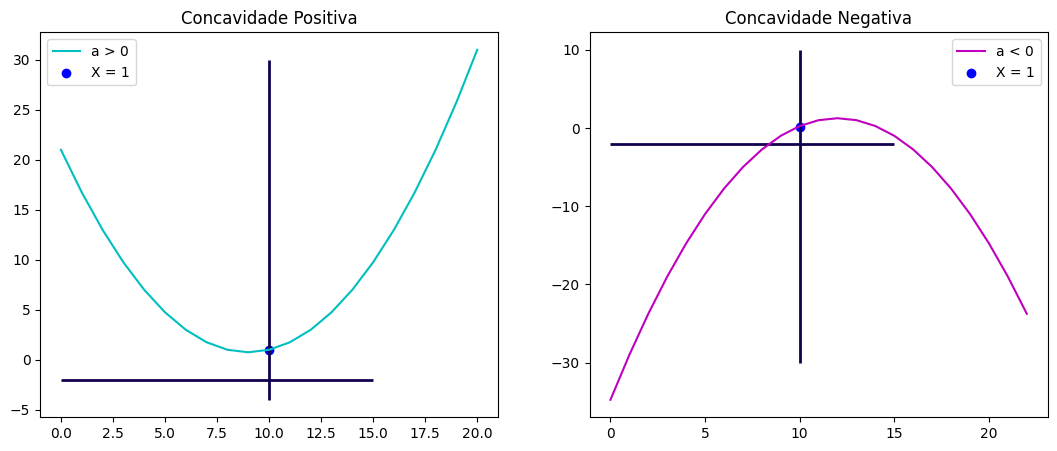

In [314]:
fig, (ax1, ax2) = plt.subplots( 1, 2, figsize=(13, 5) )
for i in zip( [[1p^2 + 1p + 1 for p in collect(-5:.5:5)], [-1p^2 + 1p + 1 for p in collect(-5.5:.5:5.5)]],
               [ax1, ax2], [1, .09], ["c", "m"], ["a > 0", "a < 0"], ["Concavidade Positiva", "Concavidade Negativa"] )
    i[2].plot( i[1], c=i[4], label=i[5] );
    i[2].hlines( -2, 0, 15, color="#12004f", linewidth=2, linestyle="-");
    i[2].scatter( 10, i[3], c="b", label="X = 1" )
    i[2].set_title(i[6])
    i[2].legend();
end
ax1.vlines( 10, -4, 30, color="#12004f", linewidth=2, linestyle="-");
ax2.vlines( 10, -30, 10, color="#12004f", linewidth=2, linestyle="-");

plt.savefig("Parábola")

    II) Calcúle as Raizes da seguinte função do segundo grau:
   a) $f(x) = x^{2} + x -2$<br>
   b) $g(x) = x^{2} - 10x + 24$<br>
   c) $h(x) = x^{2} - 15x$<br>

Exístem inúmeras formas de calcular as raizes de uma função do 2° Grau, as raizes são justamente os pontos onde a função corta o eixo **X**, geralmente quando se tem duas raizes, a função corta em dois pontos, com uma raiz somente em um ponto no eixo **x** e sem raizes a parábola esta flutuando em algum quadrante tendo apenas nos múeros complexos.

Uma das ferramentas para calcular as raizes é justamente o Bháskara, dado pela fórmula: $x = \frac{-b \pm \sqrt{\Delta}}{2 \cdot a}$ e o Delta a fórmula é $\Delta = b^{2} - 4 \cdot a \cdot b$ e para os vértices é dever de casa :D

Logo a respósta para a pergunta **a)**  utilizando bháskara é:<br>
$\sqrt{\Delta = 1^{2} - 4 \cdot 1 \cdot -2}$ Logo o delta é: $\sqrt{9}$: **3**  <br><br>
$x = \frac{-1 \pm 3}{1 \cdot 2}$ Logo as raizes são: $-2$ e $1$

Porém não é so essa a forma de calcular a equação do 2° grau, existe a fórmula dos produtos notáveis, para isso, vamos seguir esses passos:<br>
$x^{2} + \frac{bx}{a} + \frac{c}{a} = 0$, Dividir todos os lados da equação por $a$.<br> Após a divisão, transformar em um produto notável e movimentar a $\frac{c}{a}$ para o outro lado, então:<br>
$x + (\frac{b}{2a})^{2} = -\frac{c}{a} + (\frac{b}{2a})^{2}$ Para transformar em produto notável, foi uilizado a seguinte fórmula: $(x + \frac{b}{2a})^{2} = x^2 + \frac{2b}{2a}x + (\frac{b}{2a})^{2}$ o primeiro a quadrado, mais duas vezes o primeiro vezes o segundo e o quadrado do segundo, porém não tem o segundo termo ao quadrado, para isso foi preciso colocar ele ali, mas tem que colocar do outro lado também, simplificando, temos então:<br>
$x + \frac{b}{2a} = \pm \frac{\sqrt{\Delta}}{2a}$ Já foi tirado a raiz também e simplificado para $\Delta$ a expressão $b^{2} - 4 \cdot a \cdot c$, e como requer o módulo na raiz, por isso o $\pm$<br>
Finalizando nossa formula ficaria: $x = \frac{-b \pm \sqrt{\Delta}}{2a}$

E oque tudo isso quer nos dizer, simples, pode ser possível transformar qualquer equação do 2° grau em um produto notável quando possível, geralmente vai facilitar as manipualões.

**b)** Para a alternativa B, vai ser utilizado o Produto Notável.<br>
$x^{2} - 10x + 24 = 0$ pode ser escrita como $(x - 5)^{2} = \pm 1$, basta mover o $+24$ para o outro lado e somar $25$ em ambos os lados para aparecer o produto notável, pois $(x - 5)^{2} = x^{2} + 2 \cdot 5 x + 5^{2}$<br>
Então, passando o $5$ para o outro lado, consegue as duas raizes, sendo $x_1 = 6$ e $x_2 = 4$

**c)** Para a alternativa C, vai ser utilizado a Fatoração.<br>
$h(x) = x^{2} - 15x$ pode ser escrita como $h(x) = x(x - 15)$ basta fazer a distributiva para encontrar o mesmo resultado.<br>Lembra que eu tinha citado que o $c$ é o ponto em que a parábola corta o eixo Y, logo essa parábola esta flutuando em um quadrante, sendo assim uma de suas raizes é **0**, e a outra é **+15**.

### <p style="color:#33039c;">1.1.4. Função Exponencial</p>

A função exponencial é dada pela fórmula $f(x) = a^{x}$<br>
A carinha dessa função é como um lado da função do 2° grau, onde sempre vai cortar o eixo **Y** em 1, pois todo $a^{0} = 1$.

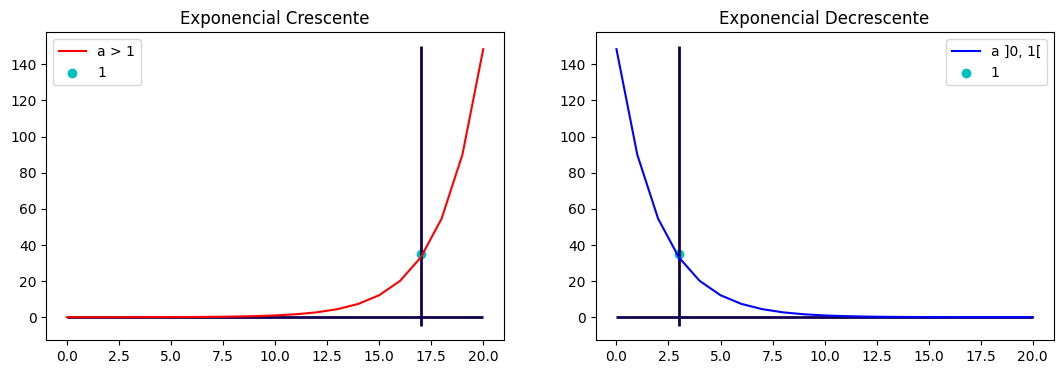

In [363]:
fig, (ax1, ax2) = plt.subplots( 1, 2, figsize=(13, 4) )
for i in zip( [[exp(p) for p in collect(-5:.5:5)], [exp(-p) for p in collect(-5:.5:5)]], 
               [ax1, ax2], ["r", "b"], ["Exponencial Crescente", "Exponencial Decrescente"], ["a > 1", "a ]0, 1["], [17, 3] )
    i[2].plot( i[1], color=i[3], label=i[5] );
    i[2].hlines( 0, 0, 20, color="#12004f", linewidth=2, linestyle="-");
    i[2].scatter( i[6], 35, c="c", label="1" )
    i[2].set_title(i[4])
    i[2].legend()
end
ax1.vlines( 17, -5, 150, color="#12004f", linewidth=2, linestyle="-");;
ax2.vlines( 3, -5, 150, color="#12004f", linewidth=2, linestyle="-");

plt.savefig("Exp.png")

### <p style="color:#33039c;">1.1.5. Função Logarítimica</p>

A função logarítimica é dada pela fórmula $f(x) = log{x}$<br>
A carinha dessa função é ao contrario da função exponencial onde corta o exiso **x** em 1.<br>
Tem as mesmas propriedades da exponencial, porem agora em relação ao eixo x.

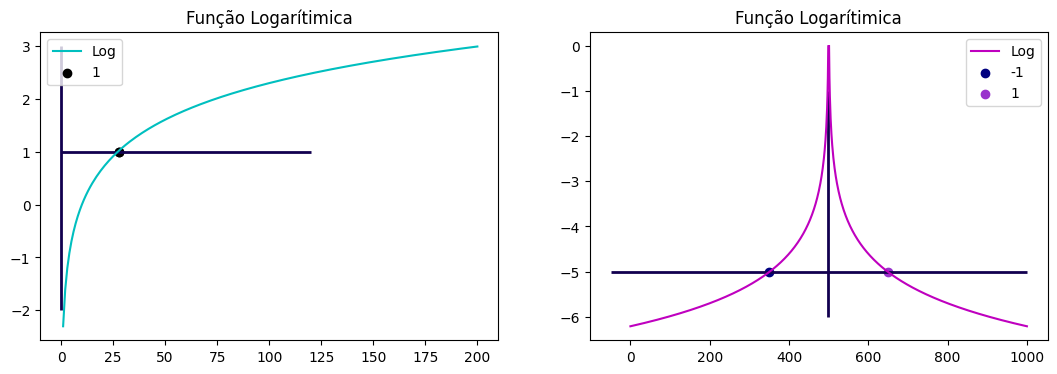

In [459]:
fig, (ax1, ax2) = plt.subplots( 1, 2, figsize=(13, 4) )
for i in zip( [[log(i) for i in 0:.1:20], [-log(Complex(i)) for i in -50*10:1:50*10]], [ax1, ax2], ["c", "m"],
               [350, 650], [-1, 1], ["navy", "darkorchid"] )
    i[2].plot( i[1], color=i[3], label="Log" );
    i[2].set_title("Função Logarítimica")
    ax2.scatter( i[4], -5, c=i[6], label=i[5] )
    ax1.scatter( 28, 1, c="k", label="1" )
    i[2].legend();
end
ax1.vlines( 0, -2, 3, color="#12004f", linewidth=2, linestyle="-")
ax1.hlines( 1, 0, 120, color="#12004f", linewidth=2, linestyle="-")
ax2.hlines( -5, 10*100, -50, color="#12004f", linewidth=2, linestyle="-")
ax2.vlines( 499, -6, -1, color="#12004f", linewidth=2, linestyle="-");

plt.savefig("Log.png")

## 1.2. Limites

Existe a versão corrigida da fórmula de cramér que esta abaixo, k e r são as dimensões da matriz.

## 1.3. Derivadas

## 1.3. Integrais

# 2.0. Referências

Hamilton Luiz Guidorizzi **Um cúrso de Cálculo Vol 1. 5 Edição**.
<br>Link: https://edisciplinas.usp.br/pluginfile.php/5580657/mod_resource/content/2/Um%20Curso%20de%20C%C3%A1lculo%20Vol%2001.pdf<br><br>
Douglas Maiolli **Calculo I - Limites Derivadas & Integrais**<br>Link: https://www.youtube.com/watch?v=EJ5FGPZbKeo&list=PLrOyM49ctTx8go5KFpSr-EMScIPygZNob<br><br>Geogebra **Geogebra Calculator**<br>Link: https://www.geogebra.org/calculator